In [ ]:
import pandas as pd

# === 1. Contoh: Membaca dataset ===
# (Gantilah dengan path file asli atau gunakan DataFrame yang sudah dimuat sebelumnya)
customers = pd.read_csv('https://drive.google.com/uc?id=1T4hH0U_BmeVe5JjKgLWg844imb9ilJ5f')
dates = pd.read_csv('https://drive.google.com/uc?id=1B4FImhpzHa_boMvDkBKZTN55jGFkfnRK')
products = pd.read_csv('https://drive.google.com/uc?id=1i8gHc89hNrz_FUH3qVjw1TNHtkg8PbKk')
orders = pd.read_csv('https://drive.google.com/uc?id=1Zasngitnnrc-nXVkboEOlBC5cTEsx_JQ')
views = pd.read_csv('https://drive.google.com/uc?id=18fqckqL9RwqrbmQ9TJWGuaiTaDGo5mS3')

# === 2. Gabungkan tabel fakta (orders) dengan tabel dimensi ===

# Join orders dengan customer
df_merged = pd.merge(orders, customers, on='customer_key', how='left')

# Join dengan product
df_merged = pd.merge(df_merged, products, on='product_key', how='left')

# Join dengan date
df_merged = pd.merge(df_merged, dates, on='date_key', how='left')

# === 3. (Opsional) Gabungkan dengan data view ===
# Gunakan 'left join' agar tetap menyimpan semua transaksi walau tidak semua punya data view
final_dataset = pd.merge(df_merged, views,
                         on=['customer_key', 'product_key', 'date_key'],
                         how='left',
                         suffixes=('', '_view'))

# === 4. (Opsional) Rapikan kolom ===
# Misalnya: urutkan berdasarkan tanggal atau pelanggan
df = final_dataset.sort_values(by=['full_date', 'customer_key']).reset_index(drop=True)

# === 5. Simpan hasil akhir ===
final_dataset.to_csv('df.csv', index=False)

print("✅ Dataset gabungan berhasil dibuat!")
df.head()

✅ Dataset gabungan berhasil dibuat!


,order_id,date_key,customer_key,product_key,quantity,unit_price,discount_rate,total_amount,payment_method,channel,...,rating,full_date,year,quarter,month,week,day,view_id,view_duration_sec,device_type
0,2457,20250101,168,159,2,82900.0,0.00,165800.0,Credit Card,Marketplace,...,5.0,2025-01-01,2025,1,1,1,1,NaN,NaN,NaN
1,4375,20250101,456,501,2,1040700.0,0.10,1873260.0,COD,Mobile App,...,4.3,2025-01-01,2025,1,1,1,1,NaN,NaN,NaN
2,144,20250101,564,404,1,257000.0,0.15,218450.0,E-Wallet,Website,...,4.2,2025-01-01,2025,1,1,1,1,NaN,NaN,NaN
3,2180,20250101,822,475,1,4064600.0,0.00,4064600.0,Credit Card,Website,...,3.9,2025-01-01,2025,1,1,1,1,NaN,NaN,NaN
4,1866,20250101,878,185,5,1646400.0,0.00,8232000.0,Credit Card,Website,...,3.6,2025-01-01,2025,1,1,1,1,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   date_key           10000 non-null  int64  
 2   customer_key       10000 non-null  int64  
 3   product_key        10000 non-null  int64  
 4   quantity           10000 non-null  int64  
 5   unit_price         10000 non-null  float64
 6   discount_rate      10000 non-null  float64
 7   total_amount       10000 non-null  float64
 8   payment_method     10000 non-null  object 
 9   channel            10000 non-null  object 
 10  delivery_status    10000 non-null  object 
 11  name               10000 non-null  object 
 12  gender             10000 non-null  object 
 13  age                10000 non-null  int64  
 14  segment            10000 non-null  object 
 15  region             10000 non-null  object 
 16  signup_date        1000

In [ ]:
from google.colab import files

# Unduh file df.csv
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
# --- 2. Pastikan kolom tanggal dalam format datetime ---
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

In [ ]:
# --- 3. Tambahkan kolom bantu: bulan dan tahun-bulan ---
df['month_name'] = df['full_date'].dt.strftime('%B')              # Nama bulan (January, February, dst)
df['year_month'] = df['full_date'].dt.to_period('M').astype(str)  # Format: '2025-10'

In [ ]:
# --- 4. Hitung total penjualan per bulan, region, dan metode pembayaran ---
sales_summary = (
    df.groupby(['year_month', 'region', 'payment_method'])
      .agg(
          total_sales=('total_amount', 'sum'),
          total_orders=('order_id', 'nunique'),
          avg_discount=('discount_rate', 'mean')
      )
      .reset_index()
      .sort_values(by=['year_month', 'region'])
)

In [ ]:
# --- 5. Tampilkan hasil agregasi ---
print("=== Total Penjualan per Bulan, Region, dan Metode Pembayaran ===")
sales_summary.head(20)

=== Total Penjualan per Bulan, Region, dan Metode Pembayaran ===


,year_month,region,payment_method,total_sales,total_orders,avg_discount
0,2025-01,Bali,Bank Transfer,29028965.0,30,0.076667
1,2025-01,Bali,COD,22287820.0,5,0.020000
2,2025-01,Bali,Credit Card,109894665.0,61,0.062295
3,2025-01,Bali,E-Wallet,91383670.0,58,0.074138
4,2025-01,DKI Jakarta,Bank Transfer,48567265.0,34,0.051471
5,2025-01,DKI Jakarta,COD,13871180.0,9,0.088889
6,2025-01,DKI Jakarta,Credit Card,62529780.0,45,0.054444
7,2025-01,DKI Jakarta,E-Wallet,53012005.0,38,0.071053
8,2025-01,Jawa Barat,Bank Transfer,46564435.0,35,0.075714
9,2025-01,Jawa Barat,COD,18382150.0,14,0.064286


In [ ]:
# --- 6. (Opsional) Simpan hasil ke file ---
sales_summary.to_csv('sales_summary_by_month_region_payment.csv', index=False)

# --- 7. (Opsional) Visualisasi total penjualan per bulan ---
monthly_sales = sales_summary.groupby('year_month')['total_sales'].sum()

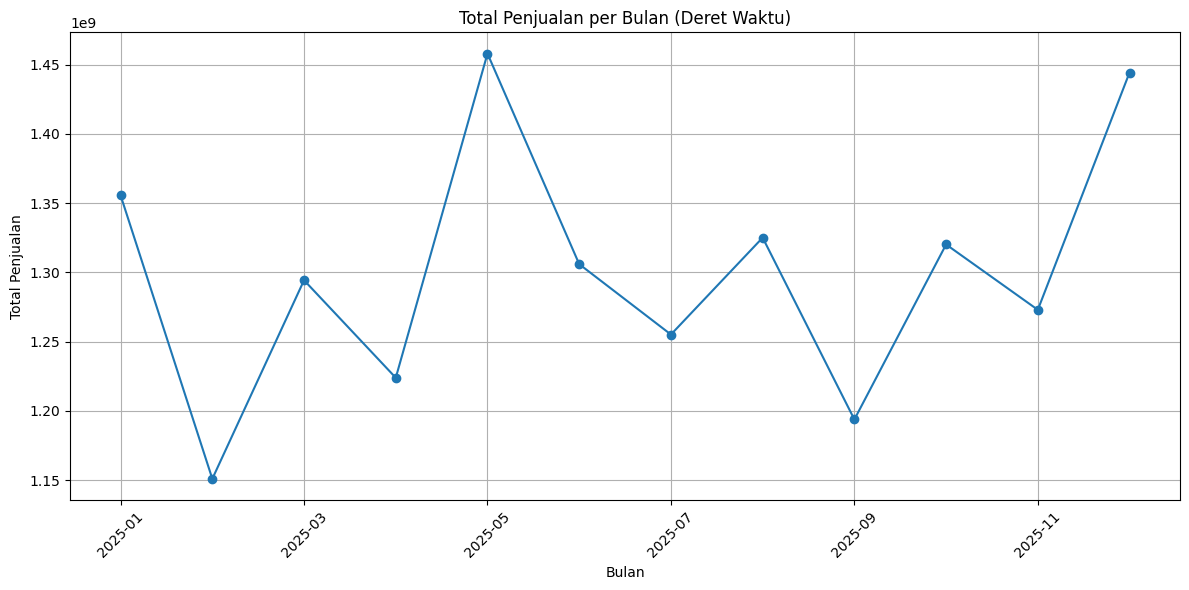

In [ ]:
plt.figure(figsize=(12, 6))  # Ukuran figure yang lebih besar untuk deret waktu
monthly_sales.plot(kind='line', marker='o') # Mengubah jenis plot menjadi 'line' dan menambahkan marker
plt.title('Total Penjualan per Bulan (Deret Waktu)') # Mengganti judul
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Pastikan kolom tanggal diubah ke datetime
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

In [ ]:
import plotly.express as px

# Pastikan kolom tanggal diubah ke datetime
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

# Tambahkan kolom year_month jika belum ada
if 'year_month' not in df.columns:
  df['year_month'] = df['full_date'].dt.to_period('M').astype(str)

# =====================================================
# 1. Grafik Penjualan per Bulan dan per Kategori Produk
# =====================================================
sales_month_category = (
    df.groupby(['year_month', 'category'], as_index=False)
    .agg(total_sales=('total_amount', 'sum'),
         total_quantity=('quantity', 'sum'))
)

# --- Chart Recommendation: MULTI-SERIES LINE CHART ---
# Alasan: cocok untuk melihat tren penjualan per bulan & per kategori dari waktu ke waktu
fig1 = px.line(
    sales_month_category,
    x='year_month',  # Gunakan year_month untuk sumbu x (deret waktu)
    y='total_sales',
    color='category', # Warna berdasarkan kategori
    title='📊 Penjualan per Bulan dan per Kategori Produk (Deret Waktu)',
    labels={'total_sales': 'Total Penjualan', 'year_month': 'Bulan'}
)
# fig1.update_layout(xaxis=dict(dtick=1)) # Tidak perlu dtick untuk year_month string
fig1.update_xaxes(categoryorder='category ascending') # Mengurutkan bulan pada sumbu x
fig1.show()

In [ ]:
# =====================================================
# 2. Peta Interaktif Penjualan per Wilayah
# =====================================================
sales_region = (
    df.groupby('region', as_index=False)
    .agg(total_sales=('total_amount', 'sum'),
         total_orders=('order_id', 'nunique'),
         avg_order_value=('total_amount', 'mean'))
    .sort_values(by='total_sales', ascending=False)
)

# --- Chart Recommendation: MAP atau BAR CHART ---
# Jika 'region' berupa nama provinsi Indonesia → gunakan map;
# Jika tidak punya koordinat, gunakan horizontal bar.
fig2 = px.bar(
    sales_region,
    x='total_sales',
    y='region',
    orientation='h',
    title='🗺️ Total Penjualan per Wilayah',
    labels={'region': 'Wilayah', 'total_sales': 'Total Penjualan'}
)
fig2.update_layout(yaxis={'categoryorder': 'total ascending'})
fig2.show()

In [ ]:
# =====================================================
# 3. Chart Performa Metode Pembayaran
# =====================================================
payment_performance = (
    df.groupby('payment_method', as_index=False)
    .agg(total_sales=('total_amount', 'sum'),
         total_orders=('order_id', 'nunique'))
    .sort_values(by='total_sales', ascending=False)
)

# --- Chart Recommendation: PIE CHART ---
# Alasan: menampilkan proporsi kontribusi tiap metode pembayaran
fig3 = px.pie(
    payment_performance,
    names='payment_method',
    values='total_sales',
    title='💳 Performa Metode Pembayaran (Proporsi Penjualan)',
    hole=0.4
)
fig3.show()

In [ ]:
# =====================================================
# 4. Analisis Perilaku Pelanggan (Frekuensi & AOV)
# =====================================================
customer_behavior = (
    df.groupby('customer_key', as_index=False)
    .agg(frequency=('order_id', 'nunique'),
         total_spent=('total_amount', 'sum'))
)
customer_behavior['AOV'] = customer_behavior['total_spent'] / customer_behavior['frequency']

# --- Chart Recommendation: SCATTER PLOT ---
# Alasan: untuk melihat hubungan antara frekuensi pembelian dan nilai transaksi rata-rata (AOV)
fig4 = px.scatter(
    customer_behavior,
    x='frequency',
    y='AOV',
    size='total_spent',
    title='👥 Analisis Perilaku Pelanggan: Frekuensi vs AOV',
    labels={'frequency': 'Frekuensi Pembelian', 'AOV': 'Average Order Value (AOV)'},
    hover_data=['total_spent']
)
fig4.update_traces(marker=dict(opacity=0.6))
fig4.show()

In [ ]:
# Hitung total penjualan per bulan dan per metode pembayaran
sales_month_payment = (
    df.groupby(['year_month', 'payment_method'], as_index=False)
    .agg(total_sales=('total_amount', 'sum'))
    .sort_values(by=['year_month', 'payment_method'])
)

# Buat grafik deret waktu untuk setiap metode pembayaran
fig = px.line(
    sales_month_payment,
    x='year_month',
    y='total_sales',
    color='payment_method',
    title='📈 Perkembangan Penjualan per Bulan dan per Metode Pembayaran',
    labels={'total_sales': 'Total Penjualan', 'year_month': 'Bulan', 'payment_method': 'Metode Pembayaran'}
)
fig.update_xaxes(categoryorder='category ascending')
fig.show()

=== Matriks Korelasi ===


,discount_rate,quantity,unit_price,total_amount
discount_rate,1.000000,0.012461,0.006596,-0.041359
quantity,0.012461,1.000000,0.012891,0.473726
unit_price,0.006596,0.012891,1.000000,0.753487
total_amount,-0.041359,0.473726,0.753487,1.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



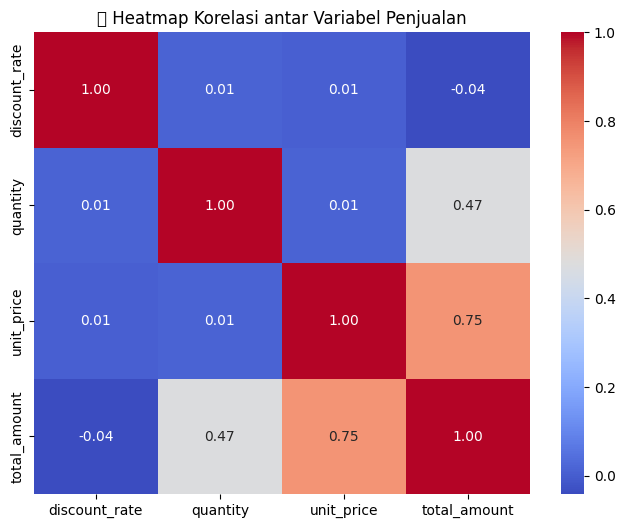

In [ ]:
import seaborn as sns

# Pastikan kolom numerik sudah benar
num_cols = ['discount_rate', 'quantity', 'unit_price', 'total_amount']

# Filter data numerik
df_num = df[num_cols].copy()

# ===========================================
# 1️⃣ Hitung Korelasi Pearson antar variabel
# ===========================================
corr_matrix = df_num.corr(method='pearson')

# Tampilkan matriks korelasi
print("=== Matriks Korelasi ===")
display(corr_matrix)

# ===========================================
# 2️⃣ Visualisasi Heatmap Korelasi
# ===========================================
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('🔥 Heatmap Korelasi antar Variabel Penjualan')
plt.show()